In [15]:
import pandas as pd
import numpy as np
import os
import datetime

from functools import reduce

In [2]:
os.chdir('/Users/pbenson/Documents/Min_Max_Project')

In [163]:
def read_txn_df(dir_path):
    txn_converter = {'TXN - Transaction Type': str,
                 'TXN - Transaction Date': str,
                 'TXN - Item ID': str,
                 'TXN - Qty': float,
                 'TXN - Total Cost': float}
    
    print('Reading dataframe')
    txn_df = pd.read_csv(dir_path, converters=txn_converter, index_col=0)
    
    print('Filtering to Out TXN\'s')
    
    out_txns = txn_df.loc[txn_df['TXN - Transaction Type'] == '030']
    
    small_df = out_txns[['TXN - Item ID', 'TXN - Unit', 'TXN - Transaction Date', 'TXN - Qty']]
    
    small_df['TXN - Transaction Date'] = pd.to_datetime(small_df['TXN - Transaction Date'])
    small_df.rename(columns = {'TXN - Unit':'Base'}, inplace=True)

    print('Calculating dates')
    today = datetime.date.today()
    small_df['today'] = today
    small_df['today'] = pd.to_datetime(small_df['today'])
    small_df['years_ago'] = (small_df['today'] - small_df['TXN - Transaction Date']).astype('timedelta64[Y]').astype('int')
    small_df.drop('today', axis=1, inplace=True)
    
    return small_df

In [147]:
def get_monthly_usage(txn_df, years_ago):
    
    recent_txns = txn_df.loc[txn_df['years_ago'] <= years_ago]
    
    recent_txns['TXN - Qty'] = abs(recent_txns['TXN - Qty'])
    
    year_factor = ((years_ago + 1) * 12)
    
    print(years_ago, year_factor)

    monthly_demand = recent_txns.groupby(['TXN - Item ID', 'years_ago'])['TXN - Qty'].sum().groupby('TXN - Item ID').sum() / year_factor
    
    monthly_demand_df = monthly_demand.to_frame().reset_index()
    monthly_demand_df.rename(columns={'TXN - Qty': 'mean_monthly_usage'}, inplace=True)
    
    return monthly_demand_df

In [164]:
txn_df = read_txn_df('Data/Raw_Data/full_transaction_df.csv')

Reading dataframe


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1897531115.py:9: DtypeWarning: Columns (4,7,18,19,20,21,28,34,37,41,45,48,49,51,55,57,58,59,60,67,68,70,71,72,74,76,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  txn_df = pd.read_csv(dir_path, converters=txn_converter, index_col=0)


Filtering to Out TXN's


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1897531115.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['TXN - Transaction Date'] = pd.to_datetime(small_df['TXN - Transaction Date'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1897531115.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df.rename(columns = {'TXN - Unit':'Base'}, inplace=True)
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1897531115.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Calculating dates


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1897531115.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['today'] = pd.to_datetime(small_df['today'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1897531115.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['years_ago'] = (small_df['today'] - small_df['TXN - Transaction Date']).astype('timedelta64[Y]').astype('int')
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1897531115.py:2

In [165]:
txn_df

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty,years_ago
540,04294288,BS012,2009-10-01,1.0,12
541,04094002,BS012,2009-10-01,1.0,12
542,04094003,BS012,2009-10-01,1.0,12
543,04294366,BS012,2009-10-01,5.0,12
544,04094004,BS012,2009-10-01,12.0,12
...,...,...,...,...,...
7265971,02596001,BS024,2020-06-30,2.0,1
7265972,02591676,BS023,2020-06-30,2.0,1
7265973,02690379,BS010,2020-06-30,2.0,1
7265974,04295441,BS018,2020-06-30,2.0,1


Stockout Meeting
- Marry the Stockout data to the purchasing side of things. Open PO’s, Leadtime, etc. 
- Leave in anything that’s active that has no Min/Max but has usage. 
- Add in 3 years, 5 years, and 10 years. Average usage per year?
- Segregate Rail Parts and Bus parts to have a different phantom period of time. 
    - 5 Years for Bus. 
    - 10 Years for Rail. 
- Give KJ SKUs that we think are “Phantom Items”. 

Consumables: Item Group 00. 

Also expand window: Which items will stockout very soon. 

How to keep calculating lead-times? 

Also look at Safety. 

Next Thursday: Meet in person. 

In [6]:
def get_item_group_key(dir_path):
    txn_converter = {'TXN - Transaction Type': str,
                 'TXN - Transaction Date': str,
                 'TXN - Item ID': str,
                 'TXN - Qty': float,
                 'TXN - Total Cost': float}
    
    print('Reading dataframe')
    txn_df = pd.read_csv(dir_path, converters=txn_converter, index_col=0)
    
    item_group_key = txn_df[['TXN - Item ID', 'TXN - Item Group']].drop_duplicates()
    
    return item_group_key

In [8]:
item_group_key = get_item_group_key('Data/Raw_Data/full_transaction_df.csv')

Reading dataframe


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1364281907.py:9: DtypeWarning: Columns (4,7,18,19,20,21,28,34,37,41,45,48,49,51,55,57,58,59,60,67,68,70,71,72,74,76,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  txn_df = pd.read_csv(dir_path, converters=txn_converter, index_col=0)


In [9]:
item_group_key

,TXN - Item ID,TXN - Item Group
0,05021408,00
1,02545876,00
2,00250066,00
3,02063020,00
4,04390100,90
...,...,...
7132143,R12498886,75
7132151,885211,75
7132168,896804,75
7176995,Q513716201,09


In [166]:
get_monthly_usage(txn_df, 2)

2 36


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/2799699311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_txns['TXN - Qty'] = abs(recent_txns['TXN - Qty'])


,TXN - Item ID,mean_monthly_usage
0,00170009,10.972222
1,00170020,0.083333
2,00170033,0.277778
3,00170074,0.027778
4,00173018,0.444444
...,...,...
13038,R12375790,0.083333
13039,R12375796,0.083333
13040,R2695001,0.111111
13041,R2695002,0.138889


In [167]:
usage_df_2_years = get_monthly_usage(txn_df, 2)
usage_df_3_years = get_monthly_usage(txn_df, 3)
usage_df_5_years = get_monthly_usage(txn_df, 5)
usage_df_10_years = get_monthly_usage(txn_df, 10)

usage_dfs = [usage_df_2_years, usage_df_3_years, usage_df_5_years, usage_df_10_years]

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/2799699311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_txns['TXN - Qty'] = abs(recent_txns['TXN - Qty'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/2799699311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_txns['TXN - Qty'] = abs(recent_txns['TXN - Qty'])


2 36
3 48


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/2799699311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_txns['TXN - Qty'] = abs(recent_txns['TXN - Qty'])


5 72


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/2799699311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_txns['TXN - Qty'] = abs(recent_txns['TXN - Qty'])


10 132


In [168]:
usage_df_2_years

,TXN - Item ID,mean_monthly_usage
0,00170009,10.972222
1,00170020,0.083333
2,00170033,0.277778
3,00170074,0.027778
4,00173018,0.444444
...,...,...
13038,R12375790,0.083333
13039,R12375796,0.083333
13040,R2695001,0.111111
13041,R2695002,0.138889


In [169]:
usage_df_2_years.loc[usage_df_2_years['TXN - Item ID'] == '02681031']

,TXN - Item ID,mean_monthly_usage
4271,02681031,88.444444


In [170]:
## Test part 02681031

test_txns = txn_df.loc[txn_df['TXN - Item ID'] == '02681031']

In [171]:
test_txns

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty,years_ago
79236,02681031,BS018,2019-10-10,1.0,2
80373,02681031,BS019,2019-10-11,1.0,2
80391,02681031,BS011,2019-10-11,1.0,2
80468,02681031,BS011,2019-10-11,2.0,2
80652,02681031,BS015,2019-10-11,2.0,2
...,...,...,...,...,...
7264412,02681031,BS019,2020-06-28,1.0,1
7264580,02681031,BS019,2020-06-28,1.0,1
7265304,02681031,BS017,2020-06-29,1.0,1
7265520,02681031,BS011,2020-06-29,2.0,1


In [172]:
full_usage_df = reduce(lambda  left,right: pd.merge(left,right,on=['TXN - Item ID'],
                                            how='outer'), usage_dfs)


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/2639753148.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_monthly_usage_x'} in the result is deprecated and will raise a MergeError in a future version.
  full_usage_df = reduce(lambda  left,right: pd.merge(left,right,on=['TXN - Item ID'],


In [173]:
full_usage_df

,TXN - Item ID,mean_monthly_usage_x,mean_monthly_usage_y,mean_monthly_usage_x,mean_monthly_usage_y
0,00170009,10.972222,8.229167,5.833333,5.416667
1,00170020,0.083333,0.062500,0.041667,0.053030
2,00170033,0.277778,0.208333,0.138889,0.075758
3,00170074,0.027778,0.020833,0.680556,0.522727
4,00173018,0.444444,0.458333,0.847222,1.022727
...,...,...,...,...,...
26456,58179345,NaN,NaN,NaN,0.007576
26457,58179348,NaN,NaN,NaN,0.007576
26458,58179349,NaN,NaN,NaN,0.007576
26459,R2694038,NaN,NaN,NaN,0.477273


In [174]:
full_usage_df.set_axis(['TXN - Item ID', 'usage_2_years', 'usage_3_years', 'usage_5_years','usage_10_years'], axis=1, inplace=True)

In [175]:
full_usage_df

,TXN - Item ID,usage_2_years,usage_3_years,usage_5_years,usage_10_years
0,00170009,10.972222,8.229167,5.833333,5.416667
1,00170020,0.083333,0.062500,0.041667,0.053030
2,00170033,0.277778,0.208333,0.138889,0.075758
3,00170074,0.027778,0.020833,0.680556,0.522727
4,00173018,0.444444,0.458333,0.847222,1.022727
...,...,...,...,...,...
26456,58179345,NaN,NaN,NaN,0.007576
26457,58179348,NaN,NaN,NaN,0.007576
26458,58179349,NaN,NaN,NaN,0.007576
26459,R2694038,NaN,NaN,NaN,0.477273


In [337]:
full_usage_df.to_csv('Data/Stockouts/full_usage_df.csv')

Stockout Meeting
- Marry the Stockout data to the purchasing side of things. Open PO’s, Leadtime, etc. 
- Leave in anything that’s active that has no Min/Max but has usage. 
- Add in 3 years, 5 years, and 10 years. Average usage per year?
- Segregate Rail Parts and Bus parts to have a different phantom period of time. 
    - 5 Years for Bus. 
    - 10 Years for Rail. 
- Give KJ SKUs that we think are “Phantom Items”. 

Consumables: Item Group 00. 

Also expand window: Which items will stockout very soon. 

How to keep calculating lead-times? 

Also look at Safety. 

Next Thursday: Meet in person. 

### Next Step: Bring in Stockouts, Open PO's, Leadtime
we have all the usage for the time intervals KJ suggested.

In [253]:
stockout_df = pd.read_csv('Data/Raw_Data/WH_STOCKOUTS.csv')

In [254]:
stockout_df

,Item,Unit,Status Current,Group,Trans Date,UOM,Qty,Qty Avail,Replen Cls,Reorder Pt,Max Qty,Reord Qty,No Repl,Avg Matl Cost,Descr,Item Group,ItmFldC1A,User
0,2390030,CS004,Discontinue,41,01/05/2022,EA,0.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,CGARCIA
1,2390030,CS004,Discontinue,41,02/02/2022,EA,0.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,CGARCIA
2,2390030,CS004,Discontinue,60,02/23/2022,EA,24.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,AMORE
3,2390030,CS004,Discontinue,51,04/08/2022,EA,24.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,KHWANG
4,2390045,CS004,Discontinue,41,03/07/2022,EA,0.0,0.0,G,0.0,0.0,0.0,Y,1936.5000,"GLASS,WINDOW,C/S,EGRESS,HOPPER",90,NaN,CGARCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,CS004,Active,41,01/19/2022,EA,0.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,CGARCIA
3481,31471245,CS004,Active,30,05/04/2022,EA,1.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,MBBATCH
3482,31471245,CS004,Active,41,05/06/2022,EA,0.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,CGARCIA
3483,31471245,CS004,Active,30,05/09/2022,EA,33.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,MBBATCH


In [255]:
stockout_df.loc[stockout_df['Qty Avail'] > 0]

,Item,Unit,Status Current,Group,Trans Date,UOM,Qty,Qty Avail,Replen Cls,Reorder Pt,Max Qty,Reord Qty,No Repl,Avg Matl Cost,Descr,Item Group,ItmFldC1A,User


In [178]:
filtered_stockouts = stockout_df[['Item', 'Item Group', 'Status Current', 'No Repl', 'Reorder Pt', 'Max Qty', 'Reord Qty', 'Trans Date']]

In [179]:
filtered_stockouts

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date
0,2390030,90,Discontinue,Y,0.0,0.0,0.0,01/05/2022
1,2390030,90,Discontinue,Y,0.0,0.0,0.0,02/02/2022
2,2390030,90,Discontinue,Y,0.0,0.0,0.0,02/23/2022
3,2390030,90,Discontinue,Y,0.0,0.0,0.0,04/08/2022
4,2390045,90,Discontinue,Y,0.0,0.0,0.0,03/07/2022
...,...,...,...,...,...,...,...,...
3480,31471245,PHED,Active,N,15.0,30.0,15.0,01/19/2022
3481,31471245,PHED,Active,N,15.0,30.0,15.0,05/04/2022
3482,31471245,PHED,Active,N,15.0,30.0,15.0,05/06/2022
3483,31471245,PHED,Active,N,15.0,30.0,15.0,05/09/2022


In [180]:
filtered_stockouts['Item Group'].unique()

array(['90', '76', '00', '88', '72', 'PGEN', '64', '73', '75', '69', '61',
       'PHND', 'PRES', '62', '95', '94', '87', '93', '92', '45', '53',
       'PBDY', '85', '86', '74', '58', '70', '57', '51', '81', '82', '83',
       '96', '68', '33', '79', '95O', 'PHED'], dtype=object)

In [181]:
filtered_stockouts['Item'] = filtered_stockouts['Item'].astype('str')

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/1489248383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stockouts['Item'] = filtered_stockouts['Item'].astype('str')


In [182]:
stockouts_with_usage = filtered_stockouts.merge(full_usage_df, how='left', left_on='Item', right_on='TXN - Item ID')

stockouts_with_usage.drop('TXN - Item ID', axis=1, inplace=True)

stockouts_with_usage = stockouts_with_usage.fillna(0)

In [183]:
stockouts_with_usage

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
0,2390030,90,Discontinue,Y,0.0,0.0,0.0,01/05/2022,0.000000,0.000000,0.000000,0.000000
1,2390030,90,Discontinue,Y,0.0,0.0,0.0,02/02/2022,0.000000,0.000000,0.000000,0.000000
2,2390030,90,Discontinue,Y,0.0,0.0,0.0,02/23/2022,0.000000,0.000000,0.000000,0.000000
3,2390030,90,Discontinue,Y,0.0,0.0,0.0,04/08/2022,0.000000,0.000000,0.000000,0.000000
4,2390045,90,Discontinue,Y,0.0,0.0,0.0,03/07/2022,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,PHED,Active,N,15.0,30.0,15.0,01/19/2022,1.805556,1.354167,0.902778,0.492424
3481,31471245,PHED,Active,N,15.0,30.0,15.0,05/04/2022,1.805556,1.354167,0.902778,0.492424
3482,31471245,PHED,Active,N,15.0,30.0,15.0,05/06/2022,1.805556,1.354167,0.902778,0.492424
3483,31471245,PHED,Active,N,15.0,30.0,15.0,05/09/2022,1.805556,1.354167,0.902778,0.492424


In [184]:
def stockout_filter(row, usage_column, exclude_groups):
    # Filter out by Status, No Repl, and Reorder stuff
    if (row['No Repl'] == 'Y') or (row['Status Current'] == 'Discontinue') or \
    (row['Reorder Pt'] == 0 and row['Max Qty'] == 0 and row['Reord Qty'] == 0):
        return False 
    
    else:
        if row[usage_column] == 0:
            return False
        else:
            if row['Item Group'] in exclude_groups:
                return False
            else:
                return True
    # Filter out by usage.
    # Usage column = which column to check for usage. 
    
def filter_stockouts(stockout_df, usage_column, exclude_groups):
    temp_stock_df = stockout_df.copy(deep=True)
        
    temp_stock_df['filter'] = temp_stock_df.apply(stockout_filter, args=(usage_column, exclude_groups), axis=1)
    
    filtered_df = temp_stock_df.loc[temp_stock_df['filter'] == True]
    filtered_df.drop('filter', axis=1, inplace=True)
    
    return filtered_df
    

In [185]:
filter_stockouts(stockouts_with_usage, 'usage_2_years', [])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
256,30711003,00,Active,N,1.0,4.0,1.0,04/22/2022,0.222222,0.250000,0.208333,0.143939
257,30711003,00,Active,N,1.0,4.0,1.0,05/03/2022,0.222222,0.250000,0.208333,0.143939
434,44962002,73,Active,N,35.0,80.0,45.0,01/18/2022,15.194444,12.625000,12.291667,13.303030
435,44962002,73,Active,N,35.0,80.0,45.0,02/01/2022,15.194444,12.625000,12.291667,13.303030
436,44962002,73,Active,N,35.0,80.0,45.0,03/09/2022,15.194444,12.625000,12.291667,13.303030
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,PHED,Active,N,15.0,30.0,15.0,01/19/2022,1.805556,1.354167,0.902778,0.492424
3481,31471245,PHED,Active,N,15.0,30.0,15.0,05/04/2022,1.805556,1.354167,0.902778,0.492424
3482,31471245,PHED,Active,N,15.0,30.0,15.0,05/06/2022,1.805556,1.354167,0.902778,0.492424
3483,31471245,PHED,Active,N,15.0,30.0,15.0,05/09/2022,1.805556,1.354167,0.902778,0.492424


In [186]:
filter_stockouts(stockouts_with_usage, 'usage_10_years', [])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
256,30711003,00,Active,N,1.0,4.0,1.0,04/22/2022,0.222222,0.250000,0.208333,0.143939
257,30711003,00,Active,N,1.0,4.0,1.0,05/03/2022,0.222222,0.250000,0.208333,0.143939
434,44962002,73,Active,N,35.0,80.0,45.0,01/18/2022,15.194444,12.625000,12.291667,13.303030
435,44962002,73,Active,N,35.0,80.0,45.0,02/01/2022,15.194444,12.625000,12.291667,13.303030
436,44962002,73,Active,N,35.0,80.0,45.0,03/09/2022,15.194444,12.625000,12.291667,13.303030
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,PHED,Active,N,15.0,30.0,15.0,01/19/2022,1.805556,1.354167,0.902778,0.492424
3481,31471245,PHED,Active,N,15.0,30.0,15.0,05/04/2022,1.805556,1.354167,0.902778,0.492424
3482,31471245,PHED,Active,N,15.0,30.0,15.0,05/06/2022,1.805556,1.354167,0.902778,0.492424
3483,31471245,PHED,Active,N,15.0,30.0,15.0,05/09/2022,1.805556,1.354167,0.902778,0.492424


In [187]:
ytd_real_stockouts = filter_stockouts(stockouts_with_usage, 'usage_2_years', ['00'])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


In [188]:
ytd_real_stockouts

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
434,44962002,73,Active,N,35.0,80.0,45.0,01/18/2022,15.194444,12.625000,12.291667,13.303030
435,44962002,73,Active,N,35.0,80.0,45.0,02/01/2022,15.194444,12.625000,12.291667,13.303030
436,44962002,73,Active,N,35.0,80.0,45.0,03/09/2022,15.194444,12.625000,12.291667,13.303030
570,31471656,PBDY,Active,N,400.0,1000.0,600.0,01/04/2022,173.527778,145.833333,205.597222,226.946970
571,31471656,PBDY,Active,N,400.0,1000.0,600.0,01/17/2022,173.527778,145.833333,205.597222,226.946970
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,PHED,Active,N,15.0,30.0,15.0,01/19/2022,1.805556,1.354167,0.902778,0.492424
3481,31471245,PHED,Active,N,15.0,30.0,15.0,05/04/2022,1.805556,1.354167,0.902778,0.492424
3482,31471245,PHED,Active,N,15.0,30.0,15.0,05/06/2022,1.805556,1.354167,0.902778,0.492424
3483,31471245,PHED,Active,N,15.0,30.0,15.0,05/09/2022,1.805556,1.354167,0.902778,0.492424


In [189]:
len(ytd_real_stockouts['Item'].unique())

15

In [190]:
consumable_stockouts = filter_stockouts(stockouts_with_usage, 'usage_2_years', [])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


In [191]:
consumable_stockouts.loc[consumable_stockouts['Item Group'] == '00']

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
256,30711003,00,Active,N,1.0,4.0,1.0,04/22/2022,0.222222,0.250000,0.208333,0.143939
257,30711003,00,Active,N,1.0,4.0,1.0,05/03/2022,0.222222,0.250000,0.208333,0.143939
566,31464008,00,Active,N,0.0,1.0,1.0,02/25/2022,0.055556,0.250000,0.222222,0.204545
567,31464008,00,Active,N,0.0,1.0,1.0,04/29/2022,0.055556,0.250000,0.222222,0.204545
568,31471580,00,Active,N,2.0,6.0,2.0,02/08/2022,0.611111,0.458333,0.347222,0.378788
...,...,...,...,...,...,...,...,...,...,...,...,...
3178,31144018,00,Active,N,10.0,25.0,15.0,03/03/2022,2.277778,2.812500,3.013889,3.500000
3179,31144018,00,Active,N,10.0,25.0,15.0,04/14/2022,2.277778,2.812500,3.013889,3.500000
3180,31144018,00,Active,N,10.0,25.0,15.0,04/14/2022,2.277778,2.812500,3.013889,3.500000
3181,31144018,00,Active,N,10.0,25.0,15.0,05/10/2022,2.277778,2.812500,3.013889,3.500000


In [192]:
len(consumable_stockouts['Item'].unique())

48

Key Finding: only 80 stockouts of non-consumable parts with usage for the YTD. This is on only 16 unique SKUs. 

There are 114 stockouts of consumables, which accounts for ~60% of stockouts for the YTD. This is on 49 unique SKUs. 

In [193]:
def get_real_stockouts(original_stockout_df, usage_df, years_back, excluded_groups):
    time_frame_to_column = {2: 'usage_2_years',
                           3: 'usage_3_years',
                           5: 'usage_5_years',
                           10: 'usage_10_years'}
    
    filtered_stockouts = original_stockout_df[['Item', 'Item Group', 'Status Current', 'No Repl', 'Reorder Pt', 'Max Qty', 'Reord Qty', 'Trans Date']]
    filtered_stockouts['Item'] = filtered_stockouts['Item'].astype('str')
    
    # Merge with usage df
    stockouts_with_usage = filtered_stockouts.merge(usage_df, how='left', left_on='Item', right_on='TXN - Item ID')
    stockouts_with_usage.drop('TXN - Item ID', axis=1, inplace=True)
    stockouts_with_usage = stockouts_with_usage.fillna(0)
    
    # 
    return filter_stockouts(stockouts_with_usage, time_frame_to_column[years_back], excluded_groups)

In [194]:
all_stockouts = pd.read_csv('Data/Stockouts/WH_STOCKOUTS_FULL.csv')

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/2590342651.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  all_stockouts = pd.read_csv('Data/Stockouts/WH_STOCKOUTS_FULL.csv')


In [195]:
real_all_stockouts = get_real_stockouts(all_stockouts, full_usage_df, 5, ['00'])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/4257878189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stockouts['Item'] = filtered_stockouts['Item'].astype('str')
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


In [196]:
real_all_stockouts

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
3,02424772,72,Active,N,1000.0,1500.0,1000.0,02/12/2018,215.972222,231.7500,263.847222,271.462121
4,02424772,72,Active,N,1000.0,1500.0,1000.0,04/14/2018,215.972222,231.7500,263.847222,271.462121
5,02424772,72,Active,N,1000.0,1500.0,1000.0,05/15/2018,215.972222,231.7500,263.847222,271.462121
6,02424772,72,Active,N,1000.0,1500.0,1000.0,06/20/2018,215.972222,231.7500,263.847222,271.462121
23,02424772,72,Active,N,1000.0,1500.0,1000.0,10/24/2017,215.972222,231.7500,263.847222,271.462121
...,...,...,...,...,...,...,...,...,...,...,...,...
82780,44908033,75,Active,N,0.0,1.0,1.0,10/20/2021,0.611111,0.6875,0.583333,0.575758
82781,44908033,75,Active,N,0.0,1.0,1.0,10/22/2021,0.611111,0.6875,0.583333,0.575758
82782,44908033,75,Active,N,0.0,1.0,1.0,02/04/2022,0.611111,0.6875,0.583333,0.575758
82783,44908033,75,Active,N,0.0,1.0,1.0,03/01/2022,0.611111,0.6875,0.583333,0.575758


In [197]:
len(all_stockouts)

89378

Based on this analysis, roughly 90% of our stockouts are "fake" and 10% of them are "real". Also, 10 year usage vs 5 year usage doesn't change much of anything – if we used it in the last 10 years, we've also used in the last 5 years (for the most part).

In [198]:
get_real_stockouts(all_stockouts, full_usage_df, 5, [])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/4257878189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stockouts['Item'] = filtered_stockouts['Item'].astype('str')
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
3,02424772,72,Active,N,1000.0,1500.0,1000.0,02/12/2018,215.972222,231.7500,263.847222,271.462121
4,02424772,72,Active,N,1000.0,1500.0,1000.0,04/14/2018,215.972222,231.7500,263.847222,271.462121
5,02424772,72,Active,N,1000.0,1500.0,1000.0,05/15/2018,215.972222,231.7500,263.847222,271.462121
6,02424772,72,Active,N,1000.0,1500.0,1000.0,06/20/2018,215.972222,231.7500,263.847222,271.462121
23,02424772,72,Active,N,1000.0,1500.0,1000.0,10/24/2017,215.972222,231.7500,263.847222,271.462121
...,...,...,...,...,...,...,...,...,...,...,...,...
82780,44908033,75,Active,N,0.0,1.0,1.0,10/20/2021,0.611111,0.6875,0.583333,0.575758
82781,44908033,75,Active,N,0.0,1.0,1.0,10/22/2021,0.611111,0.6875,0.583333,0.575758
82782,44908033,75,Active,N,0.0,1.0,1.0,02/04/2022,0.611111,0.6875,0.583333,0.575758
82783,44908033,75,Active,N,0.0,1.0,1.0,03/01/2022,0.611111,0.6875,0.583333,0.575758


In [200]:
get_real_stockouts(all_stockouts, full_usage_df, 10, [])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/4257878189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stockouts['Item'] = filtered_stockouts['Item'].astype('str')
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
3,02424772,72,Active,N,1000.0,1500.0,1000.0,02/12/2018,215.972222,231.7500,263.847222,271.462121
4,02424772,72,Active,N,1000.0,1500.0,1000.0,04/14/2018,215.972222,231.7500,263.847222,271.462121
5,02424772,72,Active,N,1000.0,1500.0,1000.0,05/15/2018,215.972222,231.7500,263.847222,271.462121
6,02424772,72,Active,N,1000.0,1500.0,1000.0,06/20/2018,215.972222,231.7500,263.847222,271.462121
23,02424772,72,Active,N,1000.0,1500.0,1000.0,10/24/2017,215.972222,231.7500,263.847222,271.462121
...,...,...,...,...,...,...,...,...,...,...,...,...
82780,44908033,75,Active,N,0.0,1.0,1.0,10/20/2021,0.611111,0.6875,0.583333,0.575758
82781,44908033,75,Active,N,0.0,1.0,1.0,10/22/2021,0.611111,0.6875,0.583333,0.575758
82782,44908033,75,Active,N,0.0,1.0,1.0,02/04/2022,0.611111,0.6875,0.583333,0.575758
82783,44908033,75,Active,N,0.0,1.0,1.0,03/01/2022,0.611111,0.6875,0.583333,0.575758


In [201]:
len(real_all_stockouts['Item'].unique())

160

In [202]:
len(get_real_stockouts(all_stockouts, full_usage_df, 10, [])['Item'].unique())

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/4257878189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stockouts['Item'] = filtered_stockouts['Item'].astype('str')
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/496403802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('filter', axis=1, inplace=True)


245

In [203]:
stockout_count = real_all_stockouts.groupby('Item').size().to_frame().reset_index().rename(columns={0:'stockouts'})

In [204]:
stockout_count_df = real_all_stockouts.drop('Trans Date', axis=1).drop_duplicates().merge(stockout_count, on='Item', how='left')

In [205]:
stockout_count_df

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,usage_2_years,usage_3_years,usage_5_years,usage_10_years,stockouts
0,02424772,72,Active,N,1000.0,1500.0,1000.0,215.972222,231.750000,263.847222,271.462121,410
1,02410075,PGEN,Active,N,6.0,10.0,4.0,5.972222,4.500000,8.986111,7.545455,40
2,02412031,PGEN,Active,N,100.0,200.0,100.0,20.305556,18.791667,22.875000,31.143939,175
3,02311283,51,Active,N,3.0,6.0,3.0,1.944444,1.666667,1.416667,1.227273,32
4,02311285,64,Active,N,60.0,150.0,60.0,14.083333,11.875000,12.305556,11.159091,126
...,...,...,...,...,...,...,...,...,...,...,...,...
155,43008094,75,Active,N,10.0,20.0,10.0,0.444444,0.333333,0.222222,0.121212,12
156,42708089,75,Hold,N,0.0,1.0,1.0,0.388889,0.541667,0.513889,0.477273,32
157,43008008,75,Active,N,27.0,40.0,13.0,4.083333,3.437500,4.250000,5.128788,98
158,43008011,75,Active,N,50.0,100.0,50.0,3.111111,3.041667,5.236111,3.189394,52


In [206]:
stockout_count_df.sort_values(by='stockouts', ascending=False)[0:20]

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,usage_2_years,usage_3_years,usage_5_years,usage_10_years,stockouts
31,02681031,81,Active,N,500.0,1000.0,500.0,88.444444,69.062500,46.958333,25.613636,617
125,31471656,PBDY,Active,N,400.0,1000.0,600.0,173.527778,145.833333,205.597222,226.946970,457
122,04281003,81,Active,N,500.0,1000.0,500.0,74.138889,64.645833,46.805556,25.530303,421
0,02424772,72,Active,N,1000.0,1500.0,1000.0,215.972222,231.750000,263.847222,271.462121,410
59,04295164,95,Active,N,20.0,40.0,20.0,5.333333,4.583333,4.416667,4.530303,222
89,04561378,95,Active,N,10.0,30.0,20.0,5.055556,5.395833,10.722222,9.212121,208
146,02440187,64,Active,N,70.0,145.0,78.0,14.916667,18.562500,22.236111,24.704545,189
108,02595024,95,Active,N,20.0,40.0,20.0,4.944444,4.562500,4.527778,3.628788,187
33,32258022,58,Active,N,150.0,300.0,150.0,60.194444,60.062500,69.902778,58.863636,179
2,02412031,PGEN,Active,N,100.0,200.0,100.0,20.305556,18.791667,22.875000,31.143939,175


For basically every part that stocks out often, the Reorder Pt (MIN) is less than or equal to the monthly usage. 

In [207]:
leadtime_df = pd.read_csv('Data/historical_lead_time.csv', index_col=0)

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/994930103.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  leadtime_df = pd.read_csv('Data/historical_lead_time.csv', index_col=0)


In [208]:
leadtime_df

,Lead Time,TXN - Item ID,PO Date
0,176,02591562,2021-07-08
1,1,30610041,2021-12-30
2,45,03207118,2021-11-15
3,56,03590002,2021-11-04
4,118,05295170,2021-09-03
...,...,...,...
236848,24,4590441,2004-03-10
236849,24,4590442,2004-03-10
236850,15,2661079,2004-03-19
236851,37,3296432,2004-02-26


In [228]:
grouped_lt = leadtime_df.groupby(by='TXN - Item ID')['Lead Time'].mean().to_frame().reset_index().rename(columns={'TXN - Item ID':'Item'})

grouped_lt['Lead Time'] = grouped_lt['Lead Time'] / 30

grouped_lt['Lead Time'] = grouped_lt['Lead Time'] + 1

In [229]:
stockout_counts_with_lt = stockout_count_df.merge(grouped_lt, how='left', on='Item')

In [230]:
stockout_counts_with_lt

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,usage_2_years,usage_3_years,usage_5_years,usage_10_years,stockouts,Lead Time
0,02424772,72,Active,N,1000.0,1500.0,1000.0,215.972222,231.750000,263.847222,271.462121,410,2.251111
1,02410075,PGEN,Active,N,6.0,10.0,4.0,5.972222,4.500000,8.986111,7.545455,40,3.033333
2,02412031,PGEN,Active,N,100.0,200.0,100.0,20.305556,18.791667,22.875000,31.143939,175,1.916667
3,02311283,51,Active,N,3.0,6.0,3.0,1.944444,1.666667,1.416667,1.227273,32,3.206667
4,02311285,64,Active,N,60.0,150.0,60.0,14.083333,11.875000,12.305556,11.159091,126,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,43008094,75,Active,N,10.0,20.0,10.0,0.444444,0.333333,0.222222,0.121212,12,NaN
156,42708089,75,Hold,N,0.0,1.0,1.0,0.388889,0.541667,0.513889,0.477273,32,2.900000
157,43008008,75,Active,N,27.0,40.0,13.0,4.083333,3.437500,4.250000,5.128788,98,5.236667
158,43008011,75,Active,N,50.0,100.0,50.0,3.111111,3.041667,5.236111,3.189394,52,8.116667


In [231]:
stockout_counts_with_lt.sort_values(by='stockouts',ascending=False)[0:20]

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,usage_2_years,usage_3_years,usage_5_years,usage_10_years,stockouts,Lead Time
31,02681031,81,Active,N,500.0,1000.0,500.0,88.444444,69.062500,46.958333,25.613636,617,3.137778
125,31471656,PBDY,Active,N,400.0,1000.0,600.0,173.527778,145.833333,205.597222,226.946970,457,2.700463
122,04281003,81,Active,N,500.0,1000.0,500.0,74.138889,64.645833,46.805556,25.530303,421,1.777778
0,02424772,72,Active,N,1000.0,1500.0,1000.0,215.972222,231.750000,263.847222,271.462121,410,2.251111
59,04295164,95,Active,N,20.0,40.0,20.0,5.333333,4.583333,4.416667,4.530303,222,1.314141
89,04561378,95,Active,N,10.0,30.0,20.0,5.055556,5.395833,10.722222,9.212121,208,1.583333
146,02440187,64,Active,N,70.0,145.0,78.0,14.916667,18.562500,22.236111,24.704545,189,1.616667
108,02595024,95,Active,N,20.0,40.0,20.0,4.944444,4.562500,4.527778,3.628788,187,1.544444
33,32258022,58,Active,N,150.0,300.0,150.0,60.194444,60.062500,69.902778,58.863636,179,1.499020
2,02412031,PGEN,Active,N,100.0,200.0,100.0,20.305556,18.791667,22.875000,31.143939,175,1.916667


In [232]:
# calculate the min
stockout_counts_with_min = stockout_counts_with_lt.copy(deep=True)

stockout_counts_with_min['calc_min'] = stockout_counts_with_min['usage_2_years'] * stockout_counts_with_min['Lead Time']
stockout_counts_with_min['calc_roq'] = stockout_counts_with_min['usage_2_years'] * 6

stockout_counts_with_min = stockout_counts_with_min.fillna(0)

stockout_counts_with_min['calc_min'] = stockout_counts_with_min['calc_min'].astype('int')
stockout_counts_with_min['calc_roq'] = stockout_counts_with_min['calc_roq'].astype('int')

In [233]:
stockout_counts_with_min.sort_values(by='stockouts',ascending=False)[0:20]

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,usage_2_years,usage_3_years,usage_5_years,usage_10_years,stockouts,Lead Time,calc_min,calc_roq
31,02681031,81,Active,N,500.0,1000.0,500.0,88.444444,69.062500,46.958333,25.613636,617,3.137778,277,530
125,31471656,PBDY,Active,N,400.0,1000.0,600.0,173.527778,145.833333,205.597222,226.946970,457,2.700463,468,1041
122,04281003,81,Active,N,500.0,1000.0,500.0,74.138889,64.645833,46.805556,25.530303,421,1.777778,131,444
0,02424772,72,Active,N,1000.0,1500.0,1000.0,215.972222,231.750000,263.847222,271.462121,410,2.251111,486,1295
59,04295164,95,Active,N,20.0,40.0,20.0,5.333333,4.583333,4.416667,4.530303,222,1.314141,7,32
89,04561378,95,Active,N,10.0,30.0,20.0,5.055556,5.395833,10.722222,9.212121,208,1.583333,8,30
146,02440187,64,Active,N,70.0,145.0,78.0,14.916667,18.562500,22.236111,24.704545,189,1.616667,24,89
108,02595024,95,Active,N,20.0,40.0,20.0,4.944444,4.562500,4.527778,3.628788,187,1.544444,7,29
33,32258022,58,Active,N,150.0,300.0,150.0,60.194444,60.062500,69.902778,58.863636,179,1.499020,90,361
2,02412031,PGEN,Active,N,100.0,200.0,100.0,20.305556,18.791667,22.875000,31.143939,175,1.916667,38,121


In [243]:
real_all_stockouts.loc[real_all_stockouts['Item'] == '02681031']

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
8251,02681031,81,Active,N,500.0,1000.0,500.0,11/09/2017,88.444444,69.0625,46.958333,25.613636
8252,02681031,81,Active,N,500.0,1000.0,500.0,12/01/2017,88.444444,69.0625,46.958333,25.613636
8253,02681031,81,Active,N,500.0,1000.0,500.0,12/29/2017,88.444444,69.0625,46.958333,25.613636
8254,02681031,81,Active,N,500.0,1000.0,500.0,02/20/2018,88.444444,69.0625,46.958333,25.613636
8255,02681031,81,Active,N,500.0,1000.0,500.0,06/26/2018,88.444444,69.0625,46.958333,25.613636
...,...,...,...,...,...,...,...,...,...,...,...,...
8865,02681031,81,Active,N,500.0,1000.0,500.0,05/11/2022,88.444444,69.0625,46.958333,25.613636
8866,02681031,81,Active,N,500.0,1000.0,500.0,05/12/2022,88.444444,69.0625,46.958333,25.613636
8867,02681031,81,Active,N,500.0,1000.0,500.0,05/19/2022,88.444444,69.0625,46.958333,25.613636
8882,02681031,81,Active,N,500.0,1000.0,500.0,04/28/2022,88.444444,69.0625,46.958333,25.613636


In [234]:
leadtime_df.loc[leadtime_df['TXN - Item ID'] == '02681031'][0:20]

,Lead Time,TXN - Item ID,PO Date
2584,140,02681031,2021-04-22
5469,8,02681031,2021-04-22
5792,172,02681031,2020-10-26
6057,162,02681031,2020-10-26
6493,144,02681031,2020-10-26
7023,127,02681031,2020-10-26
7301,116,02681031,2020-10-26
8640,64,02681031,2020-10-26
9825,9,02681031,2020-10-26
11559,147,02681031,2020-04-09


In [235]:
leadtime_df.loc[leadtime_df['TXN - Item ID'] == '31471656'][0:20]

,Lead Time,TXN - Item ID,PO Date
876,86,31471656,2021-08-24
947,84,31471656,2021-08-24
1669,55,31471656,2021-08-24
2036,36,31471656,2021-08-24
7843,85,31471656,2020-11-04
8078,77,31471656,2020-11-04
11688,33,31471656,2020-07-29
15402,103,31471656,2019-12-12
16201,204,31471656,2019-08-05
17880,144,31471656,2019-08-05


In [239]:
leadtime_df.loc[leadtime_df['TXN - Item ID'] == '31471656']['Lead Time'].mean() / 30

1.7004629629629628

In [238]:
leadtime_df.loc[leadtime_df['TXN - Item ID'] == '02681031']['Lead Time'].mean() / 30

2.137777777777778

In [244]:
stockout_counts_with_min

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,usage_2_years,usage_3_years,usage_5_years,usage_10_years,stockouts,Lead Time,calc_min,calc_roq
0,02424772,72,Active,N,1000.0,1500.0,1000.0,215.972222,231.750000,263.847222,271.462121,410,2.251111,486,1295
1,02410075,PGEN,Active,N,6.0,10.0,4.0,5.972222,4.500000,8.986111,7.545455,40,3.033333,18,35
2,02412031,PGEN,Active,N,100.0,200.0,100.0,20.305556,18.791667,22.875000,31.143939,175,1.916667,38,121
3,02311283,51,Active,N,3.0,6.0,3.0,1.944444,1.666667,1.416667,1.227273,32,3.206667,6,11
4,02311285,64,Active,N,60.0,150.0,60.0,14.083333,11.875000,12.305556,11.159091,126,3.583333,50,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,43008094,75,Active,N,10.0,20.0,10.0,0.444444,0.333333,0.222222,0.121212,12,0.000000,0,2
156,42708089,75,Hold,N,0.0,1.0,1.0,0.388889,0.541667,0.513889,0.477273,32,2.900000,1,2
157,43008008,75,Active,N,27.0,40.0,13.0,4.083333,3.437500,4.250000,5.128788,98,5.236667,21,24
158,43008011,75,Active,N,50.0,100.0,50.0,3.111111,3.041667,5.236111,3.189394,52,8.116667,25,18


In [246]:
stockout_counts_with_min.sort_values(by='stockouts', ascending=False)[0:20]

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,usage_2_years,usage_3_years,usage_5_years,usage_10_years,stockouts,Lead Time,calc_min,calc_roq
31,02681031,81,Active,N,500.0,1000.0,500.0,88.444444,69.062500,46.958333,25.613636,617,3.137778,277,530
125,31471656,PBDY,Active,N,400.0,1000.0,600.0,173.527778,145.833333,205.597222,226.946970,457,2.700463,468,1041
122,04281003,81,Active,N,500.0,1000.0,500.0,74.138889,64.645833,46.805556,25.530303,421,1.777778,131,444
0,02424772,72,Active,N,1000.0,1500.0,1000.0,215.972222,231.750000,263.847222,271.462121,410,2.251111,486,1295
59,04295164,95,Active,N,20.0,40.0,20.0,5.333333,4.583333,4.416667,4.530303,222,1.314141,7,32
89,04561378,95,Active,N,10.0,30.0,20.0,5.055556,5.395833,10.722222,9.212121,208,1.583333,8,30
146,02440187,64,Active,N,70.0,145.0,78.0,14.916667,18.562500,22.236111,24.704545,189,1.616667,24,89
108,02595024,95,Active,N,20.0,40.0,20.0,4.944444,4.562500,4.527778,3.628788,187,1.544444,7,29
33,32258022,58,Active,N,150.0,300.0,150.0,60.194444,60.062500,69.902778,58.863636,179,1.499020,90,361
2,02412031,PGEN,Active,N,100.0,200.0,100.0,20.305556,18.791667,22.875000,31.143939,175,1.916667,38,121


In [248]:
stockout_counts_with_min.to_csv('Data/Stockouts/stockouts_with_recommendation.csv')

In [250]:
real_all_stockouts

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years
3,02424772,72,Active,N,1000.0,1500.0,1000.0,02/12/2018,215.972222,231.7500,263.847222,271.462121
4,02424772,72,Active,N,1000.0,1500.0,1000.0,04/14/2018,215.972222,231.7500,263.847222,271.462121
5,02424772,72,Active,N,1000.0,1500.0,1000.0,05/15/2018,215.972222,231.7500,263.847222,271.462121
6,02424772,72,Active,N,1000.0,1500.0,1000.0,06/20/2018,215.972222,231.7500,263.847222,271.462121
23,02424772,72,Active,N,1000.0,1500.0,1000.0,10/24/2017,215.972222,231.7500,263.847222,271.462121
...,...,...,...,...,...,...,...,...,...,...,...,...
82780,44908033,75,Active,N,0.0,1.0,1.0,10/20/2021,0.611111,0.6875,0.583333,0.575758
82781,44908033,75,Active,N,0.0,1.0,1.0,10/22/2021,0.611111,0.6875,0.583333,0.575758
82782,44908033,75,Active,N,0.0,1.0,1.0,02/04/2022,0.611111,0.6875,0.583333,0.575758
82783,44908033,75,Active,N,0.0,1.0,1.0,03/01/2022,0.611111,0.6875,0.583333,0.575758


In [251]:
real_all_stockouts.to_csv('Data/Stockouts/clean_real_stockouts.csv')

# Visualize stockouts

In [303]:
import matplotlib.pyplot as plt

from matplotlib import dates as mdates

In [267]:
visual_stockouts = real_all_stockouts.copy(deep=True)

In [268]:
visual_stockouts['Trans Date'] = pd.to_datetime(visual_stockouts['Trans Date'])

In [269]:
visual_stockouts['epoch'] = datetime.datetime(2004, 1, 1)

In [275]:
visual_stockouts['months_since_2004'] = (visual_stockouts['Trans Date'].dt.to_period('M').astype(int) - visual_stockouts['epoch'].dt.to_period('M').astype(int))

In [276]:
visual_stockouts

,Item,Item Group,Status Current,No Repl,Reorder Pt,Max Qty,Reord Qty,Trans Date,usage_2_years,usage_3_years,usage_5_years,usage_10_years,epoch,months_since_2004
3,02424772,72,Active,N,1000.0,1500.0,1000.0,2018-02-12,215.972222,231.7500,263.847222,271.462121,2004-01-01,169
4,02424772,72,Active,N,1000.0,1500.0,1000.0,2018-04-14,215.972222,231.7500,263.847222,271.462121,2004-01-01,171
5,02424772,72,Active,N,1000.0,1500.0,1000.0,2018-05-15,215.972222,231.7500,263.847222,271.462121,2004-01-01,172
6,02424772,72,Active,N,1000.0,1500.0,1000.0,2018-06-20,215.972222,231.7500,263.847222,271.462121,2004-01-01,173
23,02424772,72,Active,N,1000.0,1500.0,1000.0,2017-10-24,215.972222,231.7500,263.847222,271.462121,2004-01-01,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82780,44908033,75,Active,N,0.0,1.0,1.0,2021-10-20,0.611111,0.6875,0.583333,0.575758,2004-01-01,213
82781,44908033,75,Active,N,0.0,1.0,1.0,2021-10-22,0.611111,0.6875,0.583333,0.575758,2004-01-01,213
82782,44908033,75,Active,N,0.0,1.0,1.0,2022-02-04,0.611111,0.6875,0.583333,0.575758,2004-01-01,217
82783,44908033,75,Active,N,0.0,1.0,1.0,2022-03-01,0.611111,0.6875,0.583333,0.575758,2004-01-01,218


(array([ 718., 1250.,  719., 1102., 1026., 1050.,  904.,  849., 1121.,
         940.]),
 array([164. , 169.6, 175.2, 180.8, 186.4, 192. , 197.6, 203.2, 208.8,
        214.4, 220. ]),
 <BarContainer object of 10 artists>)

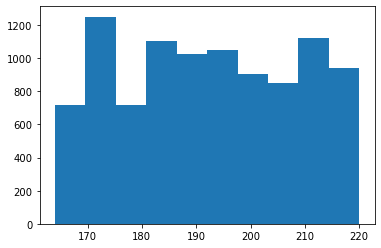

In [277]:
plt.hist(visual_stockouts['months_since_2004'])

In [281]:
all_stockouts_vis = all_stockouts.copy(deep=True)

all_stockouts_vis['Trans Date'] = pd.to_datetime(all_stockouts_vis['Trans Date'])
all_stockouts_vis['epoch'] = datetime.datetime(2004, 1, 1)
all_stockouts_vis['months_since_2004'] = (all_stockouts_vis['Trans Date'].dt.to_period('M').astype(int) - all_stockouts_vis['epoch'].dt.to_period('M').astype(int))

(array([11071., 21330.,  6709.,  9727.,  6253., 12363.,  6867.,  5288.,
         5543.,  4227.]),
 array([164. , 169.6, 175.2, 180.8, 186.4, 192. , 197.6, 203.2, 208.8,
        214.4, 220. ]),
 <BarContainer object of 10 artists>)

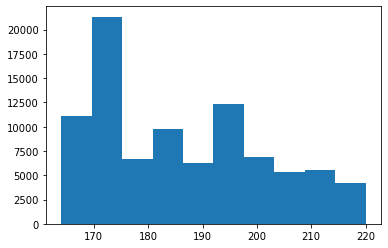

In [282]:
plt.hist(all_stockouts_vis['months_since_2004'])

In [283]:
all_stockouts_vis['Trans Date'].min()

Timestamp('2017-09-19 00:00:00')

Stockouts are only tracked since September 9th 2017. 

In [295]:
stockout_time_series =visual_stockouts.groupby('months_since_2004').size().to_frame().reset_index().rename(columns={0:'stockouts'})

In [296]:
stockout_time_series

,months_since_2004,stockouts
0,164,60
1,165,122
2,166,124
3,167,125
4,168,106
5,169,181
6,170,243
7,171,258
8,172,196
9,173,190


In [300]:
stockout_time_series['epoch'] = datetime.datetime(2004, 1, 1)

In [301]:
stockout_time_series['date'] = ((stockout_time_series['epoch'].dt.to_period('M')) + stockout_time_series['months_since_2004']).dt.to_timestamp()

In [319]:
item_time_series = visual_stockouts.groupby(['Item', 'months_since_2004']).size().to_frame().reset_index().rename(columns={0:'stockouts'})

item_time_series['epoch'] = datetime.datetime(2004, 1, 1)
item_time_series['date'] = ((item_time_series['epoch'].dt.to_period('M')) + item_time_series['months_since_2004']).dt.to_timestamp()

In [320]:
item_time_series

,Item,months_since_2004,stockouts,epoch,date
0,02311051,165,1,2004-01-01,2017-10-01
1,02311051,167,1,2004-01-01,2017-12-01
2,02311051,169,3,2004-01-01,2018-02-01
3,02311051,170,1,2004-01-01,2018-03-01
4,02311051,171,1,2004-01-01,2018-04-01
...,...,...,...,...,...
3865,44962002,218,1,2004-01-01,2022-03-01
3866,R2690116,165,1,2004-01-01,2017-10-01
3867,R2690116,175,1,2004-01-01,2018-08-01
3868,R2690116,182,1,2004-01-01,2019-03-01


In [302]:
stockout_time_series

,months_since_2004,stockouts,epoch,date
0,164,60,2004-01-01,2017-09-01
1,165,122,2004-01-01,2017-10-01
2,166,124,2004-01-01,2017-11-01
3,167,125,2004-01-01,2017-12-01
4,168,106,2004-01-01,2018-01-01
5,169,181,2004-01-01,2018-02-01
6,170,243,2004-01-01,2018-03-01
7,171,258,2004-01-01,2018-04-01
8,172,196,2004-01-01,2018-05-01
9,173,190,2004-01-01,2018-06-01


In [321]:
item_time_series_altered = item_time_series.copy(deep=True)

item_time_series_altered['stockouts'] = np.where(item_time_series_altered['stockouts'] > 1, 1,
                                                item_time_series_altered['stockouts'])

In [327]:
item_month_pad = item_time_series_altered.groupby('date').size().to_frame().reset_index().rename(columns={0:'stockouts'})

In [328]:
item_month_pad

,date,stockouts
0,2017-09-01,57
1,2017-10-01,69
2,2017-11-01,52
3,2017-12-01,46
4,2018-01-01,45
5,2018-02-01,66
6,2018-03-01,89
7,2018-04-01,80
8,2018-05-01,87
9,2018-06-01,67


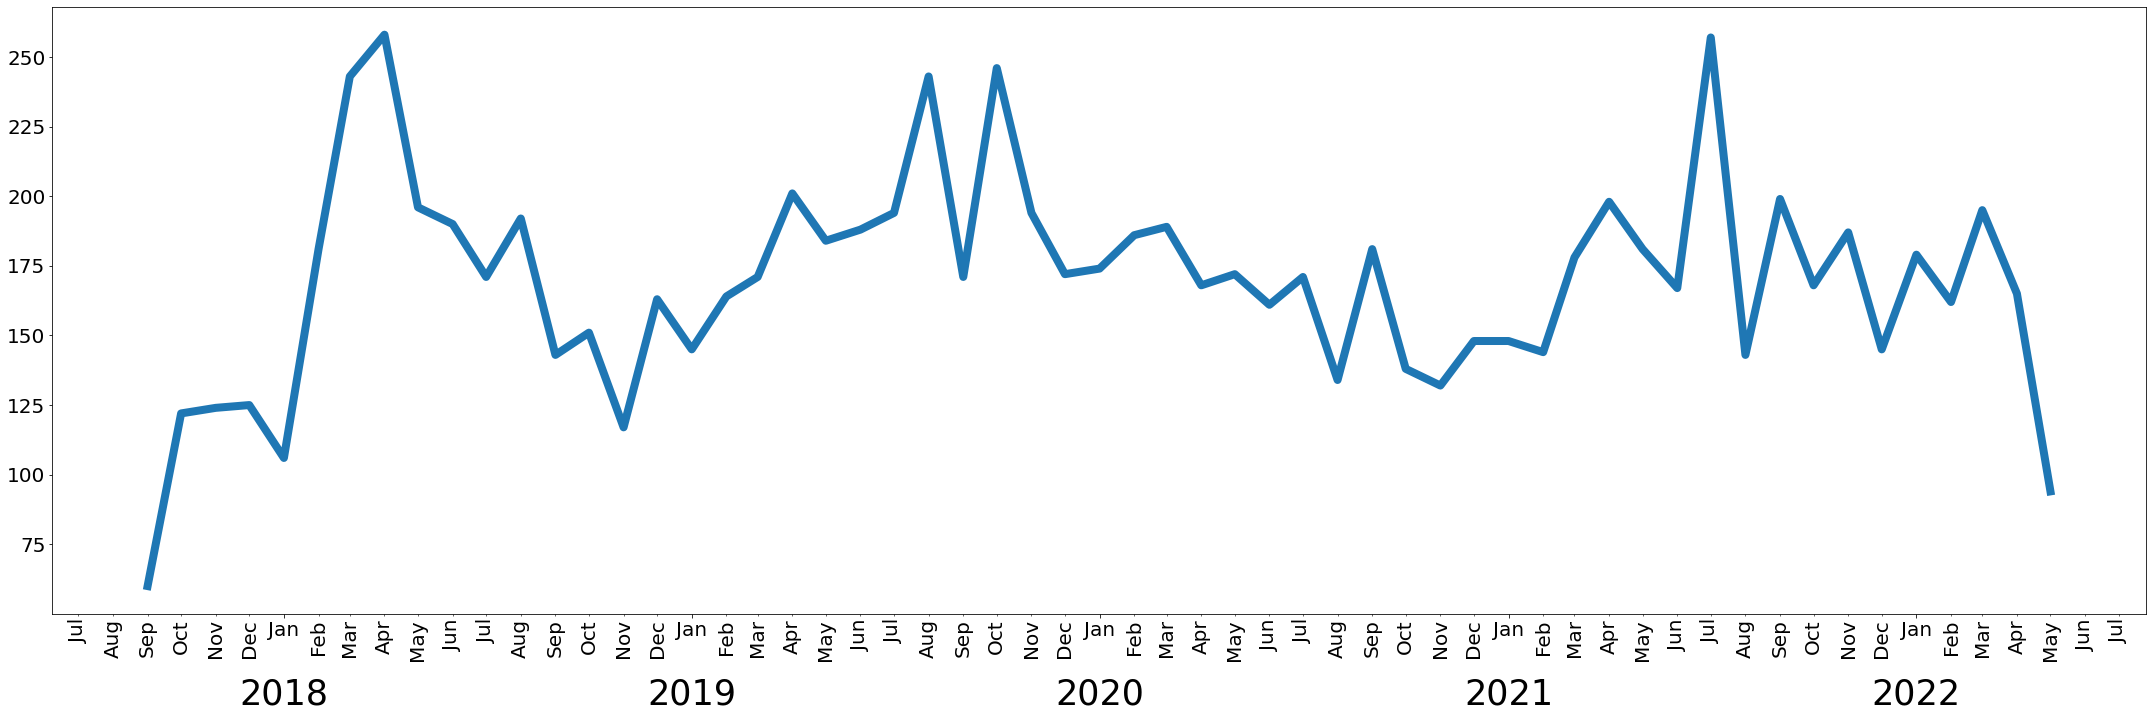

In [316]:
# Create the plot

fig, ax=plt.subplots(1, 1, figsize=(30, 10))

ax.plot(stockout_time_series['date'], stockout_time_series['stockouts'], linewidth=8)


# Minor ticks every month.
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# fontsize for month labels
ax.tick_params(labelsize=20, which='both')
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=35)

plt.tight_layout()
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
plt.show()

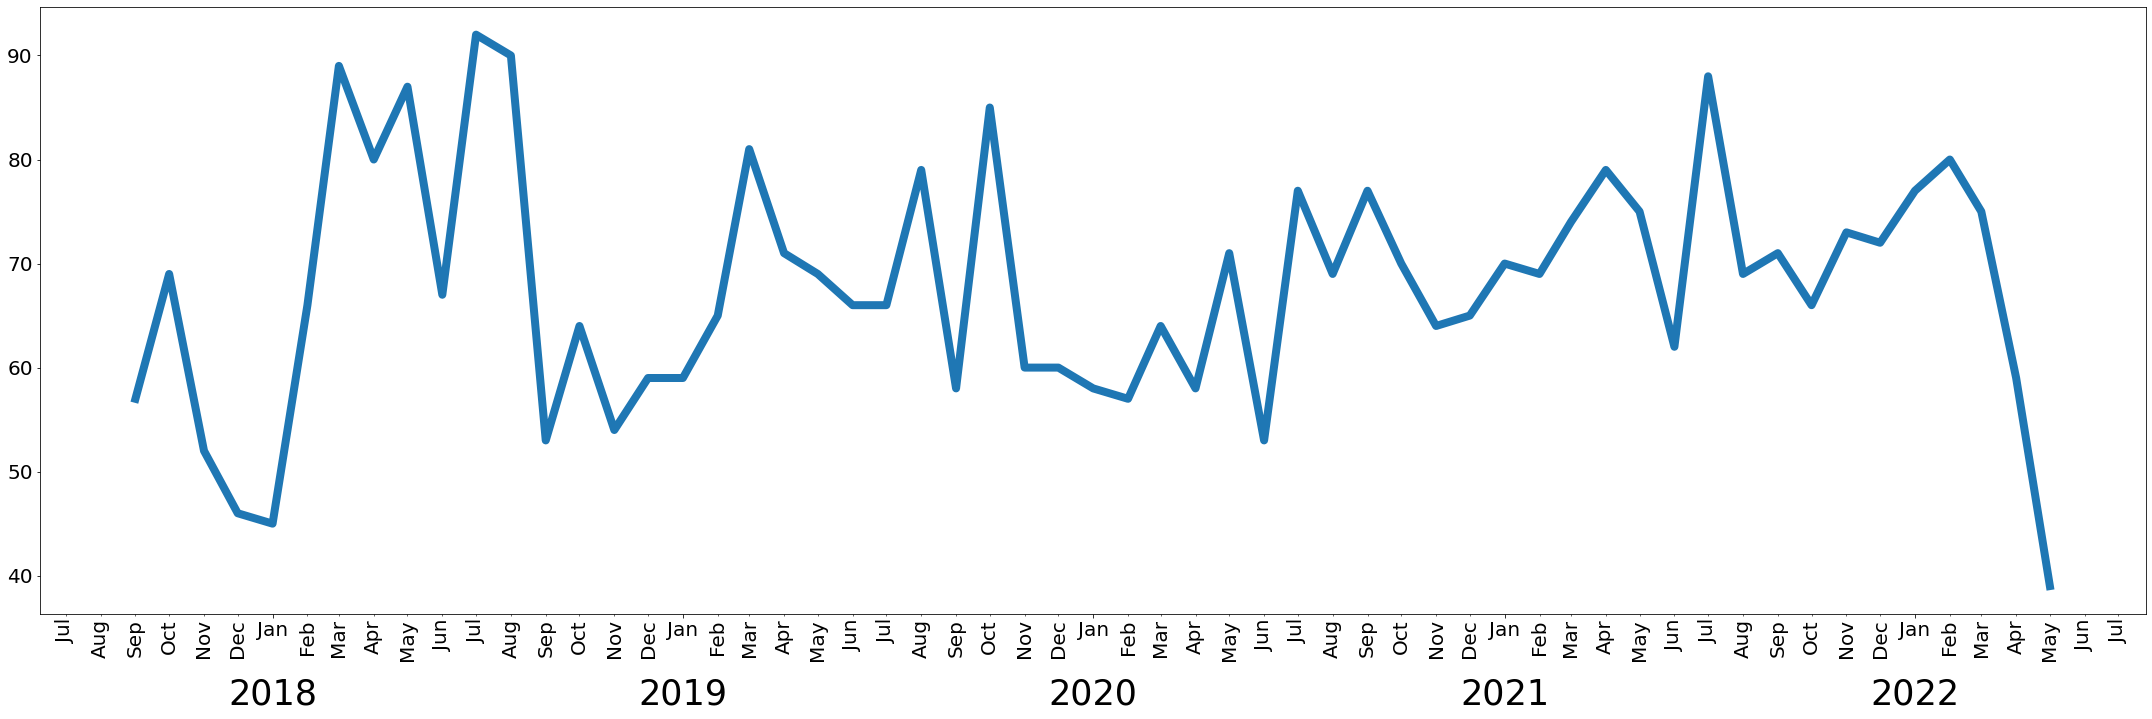

In [329]:

fig, ax=plt.subplots(1, 1, figsize=(30, 10))

ax.plot(item_month_pad['date'], item_month_pad['stockouts'], linewidth=8)


# Minor ticks every month.
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# fontsize for month labels
ax.tick_params(labelsize=20, which='both')
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=35)

plt.tight_layout()
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
plt.show()

Metric for this: Orders filled per month. Number of parts requested by bases and number of orders that we couldn't fill. 

System-wide quantity for that part during stockouts? Check my work from January. 

CS003 - Capital Spares
CS001/002 are basically empty. 

Calculate new stockouts – 

First Stage filtering: be careful about 0/0/0 parts. Have ascending stockout filters in order of which rule triggers first. 

In [333]:
ioh_data = pd.read_csv('../IOH Project/Data/full_dataframe.tsv', sep='\t', index_col=0)

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_69198/3713761736.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ioh_data = pd.read_csv('../IOH Project/Data/full_dataframe.tsv', sep='\t', index_col=0)


In [335]:
ioh_data['TXN - Transaction Date'] = pd.to_datetime(ioh_data['TXN - Transaction Date'])
ioh_data

,TXN - Transaction Type,TXN - Transaction Date,TXN - Item ID,TXN - Qty,TXN - Total Cost,TXN - Adjust Type
0,41,2009-10-01,05021408,-7.0,-9.94,D
1,41,2009-10-01,02545876,-16.0,-56.41,D
2,41,2009-10-01,00250066,-300.0,-27.99,D
3,41,2009-10-01,02063020,-12.0,-2.20,D
4,20,2009-10-01,04390100,15.0,964.45,NaN
...,...,...,...,...,...,...
7266099,22,2020-06-30,02440210,4200.0,1312.50,NaN
7266100,22,2020-06-30,02607063,5.0,440.00,NaN
7266101,22,2020-06-30,02795068,37.0,53.99,NaN
7266102,22,2020-06-30,03220638,10.0,22.92,NaN


In [ ]:
# example: get IOH on september 9th 

In [336]:
ioh_data_recent = ioh_data.loc[ioh_data['TXN - Transaction Date'] > datetime.datetime(2017, 9, 1)]

In [ ]:
def get_ioh_on_day(day, item):
    # Problem: we need starting quantities. 